# Data Importation :

In [1]:
import numpy as np
import pandas as pd

In [2]:
spam_df = pd.read_csv("spam.csv")

In [3]:
spam_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5500,ham,Love has one law; Make happy the person you lo...,NaN,NaN,NaN
5189,spam,ree entry in 2 a weekly comp for a chance to w...,NaN,NaN,NaN
3205,ham,At home also.,NaN,NaN,NaN
1425,ham,I'll be at mu in like &lt;#&gt; seconds,NaN,NaN,NaN
92,ham,Smile in Pleasure Smile in Pain Smile when tro...,NaN,NaN,NaN


In [4]:
spam_df.shape

(5572, 5)

# 1) Data Cleaning :

#### Removing Columns :

In [5]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
spam_df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [7]:
spam_df.shape

(5572, 2)

In [8]:
spam_df.sample(5)

,v1,v2
1908,ham,Hello beautiful r u ok? I've kinda ad a row wi...
5399,ham,And he's apparently bffs with carly quick now
1431,ham,My painful personal thought- \I always try to ...
4834,ham,"OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I..."
1965,ham,Thanks. It was only from tescos but quite nice...


#### Rename Columns :

In [9]:
spam_df.rename(columns={"v1":"target","v2":"text"},inplace=True)
spam_df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Label Encoding :

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
spam_df["target"] = encoder.fit_transform(spam_df["target"])
spam_df.head(5)
# ham = 0
# spam = 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Missing Values :

In [12]:
spam_df.isnull().sum()

target    0
text      0
dtype: int64

#### Duplicate Values :

In [13]:
spam_df.duplicated().sum()

403

In [14]:
spam_df = spam_df.drop_duplicates(keep="first")

In [15]:
spam_df.shape

(5169, 2)

# 2) EDA :

In [16]:
spam_df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

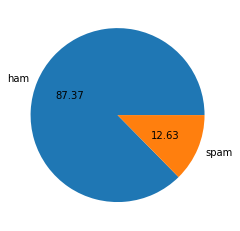

In [17]:
import matplotlib.pylab as plt
plt.pie(spam_df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [18]:
# It is Imbalanced Dataset.

In [19]:
import nltk

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# No. of Characters :
spam_df["num_characters"] = spam_df["text"].apply(len)

In [22]:
spam_df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# No. of Words :
spam_df["num_words"] = spam_df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
spam_df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# No. of Sentences :
spam_df["num_sentences"] = spam_df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
spam_df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
spam_df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# For Ham :
spam_df[spam_df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# For Spam :
spam_df[spam_df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
import seaborn as sns

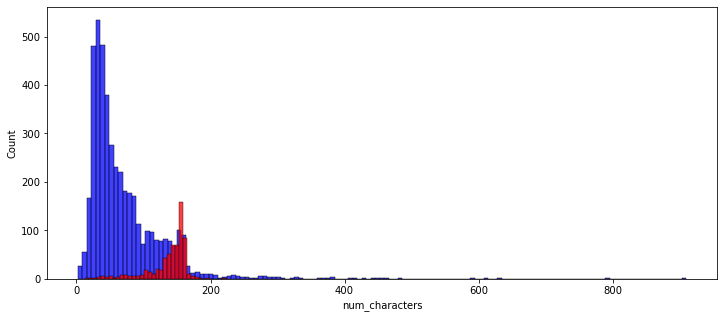

In [31]:
# No. of Characters :
plt.figure(figsize=(12,5))
sns.histplot(spam_df[spam_df["target"]==0]["num_characters"],color="blue")
sns.histplot(spam_df[spam_df["target"]==1]["num_characters"],color="red")
plt.show()

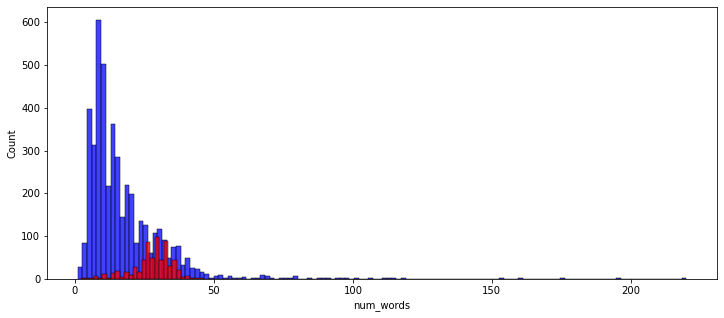

In [32]:
# No. of Words :
plt.figure(figsize=(12,5))
sns.histplot(spam_df[spam_df["target"]==0]["num_words"],color="blue")
sns.histplot(spam_df[spam_df["target"]==1]["num_words"],color="red")
plt.show()

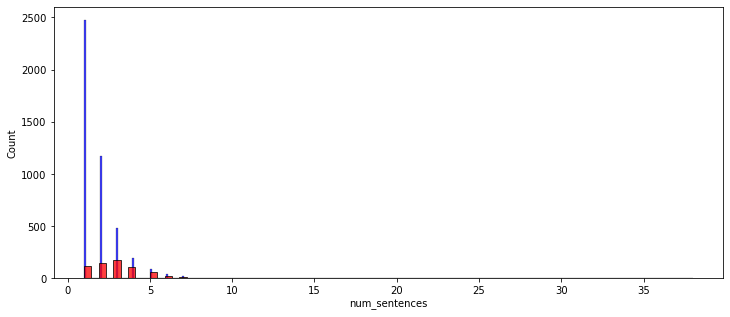

In [33]:
# No. of Sentences :
plt.figure(figsize=(12,5))
sns.histplot(spam_df[spam_df["target"]==0]["num_sentences"],color="blue")
sns.histplot(spam_df[spam_df["target"]==1]["num_sentences"],color="red")
plt.show()

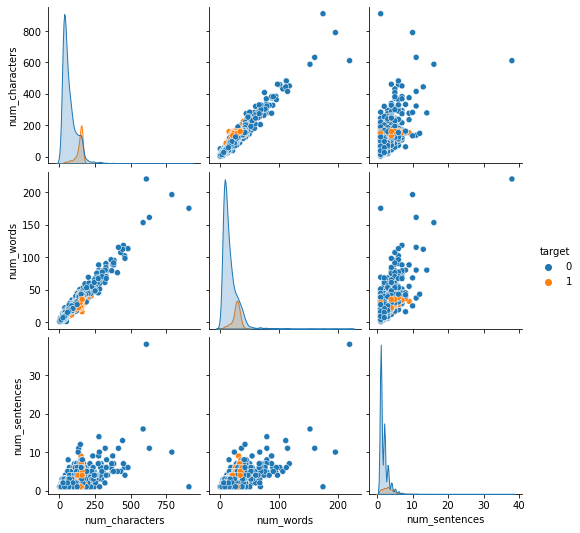

In [34]:
sns.pairplot(spam_df,hue="target")
plt.show()

In [35]:
spam_df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


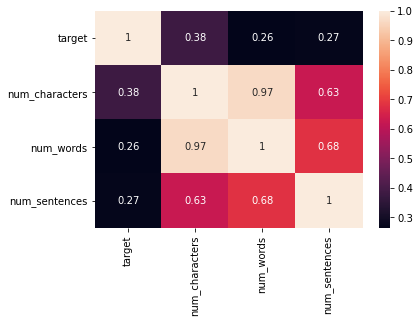

In [36]:
sns.heatmap(spam_df.corr(),annot=True)
plt.show()

# 3) Data Preprocessing (Text Preprocessing) :

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
def transform_text(text) :
    text = text.lower()  #Lower case
    
    text = nltk.word_tokenize(text)  #Word tokenize
    
    y = []  #Alpha-Numeric
    for i in text :
        if i.isalnum() :
            y.append(i)
            
            
            
    text = y[:]  #Stopwords and Punctuation
    y.clear()
    
    for i in text :
        if(i not in stopwords.words('english') and i not in string.punctuation) :
            y.append(i)
    
    
    text = y[:]
    y.clear()  #Stemming Words
    
    for i in text :
        y.append(ps.stem(i))
    
    return " ".join(y)

In [39]:
spam_df["transform_text"] = spam_df["text"].apply(transform_text)

In [40]:
spam_df.head(5)

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
# Word-Cloud :
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color="white")

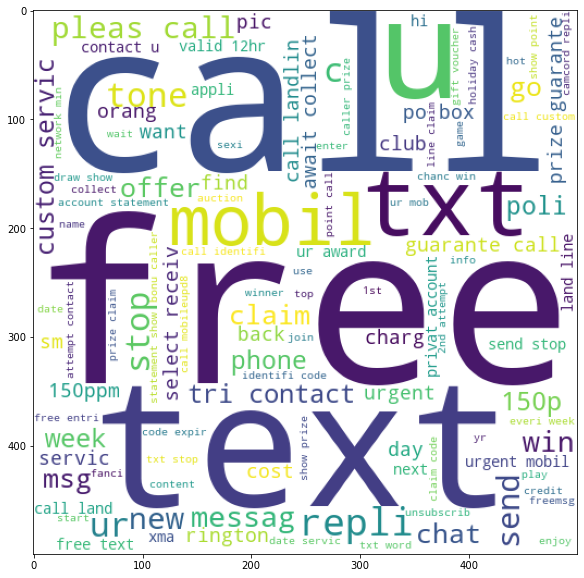

In [42]:
spam_wc = wc.generate(spam_df[spam_df["target"]==1]["transform_text"].str.cat(sep=" "))
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

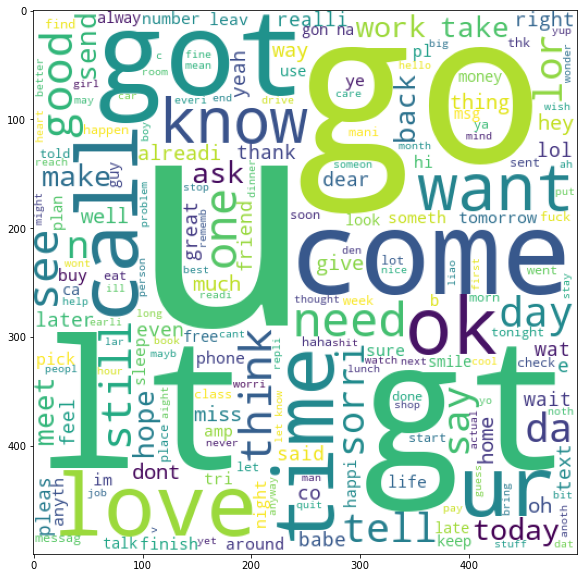

In [43]:
spam_wc = wc.generate(spam_df[spam_df["target"]==0]["transform_text"].str.cat(sep=" "))
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

In [44]:
spam_corpus = []
for msg in spam_df[spam_df["target"]==1]["transform_text"].tolist() :
    for words in msg.split() :
        spam_corpus.append(words)
        
len(spam_corpus)

9941

D:\Anaconda_Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


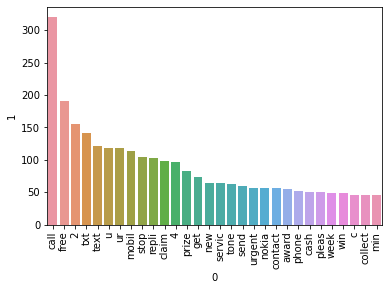

In [45]:
from collections import Counter
a = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(a[0],a[1])
plt.xticks(rotation = "vertical")
plt.show()

In [46]:
ham_corpus = []
for msg in spam_df[spam_df["target"]==0]["transform_text"].tolist() :
    for words in msg.split() :
        ham_corpus.append(words)
        
len(ham_corpus)

35303

D:\Anaconda_Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


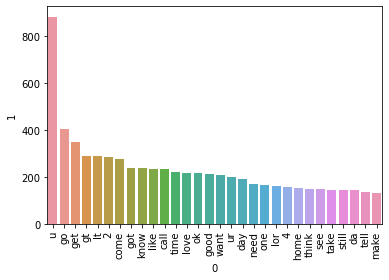

In [47]:
from collections import Counter
a = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(a[0],a[1])
plt.xticks(rotation = "vertical")
plt.show()

# 4) Model Building :

## Text Vectorization (CountVectorizer) :

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [49]:
X = cv.fit_transform(spam_df["transform_text"]).toarray()

In [50]:
X.shape

(5169, 6677)

In [51]:
y = spam_df["target"].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
# Train-Test Data Splitting :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [54]:
# Naive-Bayes Model :
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
# Perfrormance Indicators :
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
# Gaussian Naive Bayes :
gnb.fit(X_train,y_train)
y_pred_1 = gnb.predict(X_test)


print("Confusion Matrix : ",confusion_matrix(y_test,y_pred_1))
print("Accuracy Score : ",accuracy_score(y_test,y_pred_1))
print("Precision Score : ",precision_score(y_test,y_pred_1))





# Low Precision Score

Confusion Matrix :  [[775 124]
 [ 20 115]]
Accuracy Score :  0.8607350096711799
Precision Score :  0.4811715481171548


In [57]:
# Multinomial Naive Bayes :
mnb.fit(X_train,y_train)
y_pred_2 = mnb.predict(X_test)


print("Confusion Matrix : ",confusion_matrix(y_test,y_pred_2))
print("Accuracy Score : ",accuracy_score(y_test,y_pred_2))
print("Precision Score : ",precision_score(y_test,y_pred_2))





# Low Precision Score

Confusion Matrix :  [[878  21]
 [ 12 123]]
Accuracy Score :  0.9680851063829787
Precision Score :  0.8541666666666666


In [58]:
# Bernoulli Naive Bayes :
bnb.fit(X_train,y_train)
y_pred_3 = bnb.predict(X_test)


print("Confusion Matrix : ",confusion_matrix(y_test,y_pred_3))
print("Accuracy Score : ",accuracy_score(y_test,y_pred_3))
print("Precision Score : ",precision_score(y_test,y_pred_3))





# High Precision Score (But Not Satisfactory)

Confusion Matrix :  [[894   5]
 [ 42  93]]
Accuracy Score :  0.9545454545454546
Precision Score :  0.9489795918367347


## Text Vectorization (TfidfVectorizer) :

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(spam_df["transform_text"]).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y = spam_df["target"].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
# Train-Test Data Splitting :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [65]:
# Naive-Bayes Model :
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
# Perfrormance Indicators :
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
# Gaussian Naive Bayes :
gnb.fit(X_train,y_train)
y_pred_1 = gnb.predict(X_test)


print("Confusion Matrix : ",confusion_matrix(y_test,y_pred_1))
print("Accuracy Score : ",accuracy_score(y_test,y_pred_1))
print("Precision Score : ",precision_score(y_test,y_pred_1))





# Low Precision Score

Confusion Matrix :  [[774 125]
 [ 23 112]]
Accuracy Score :  0.8568665377176016
Precision Score :  0.47257383966244726


In [68]:
# Multinomial Naive Bayes :
mnb.fit(X_train,y_train)
y_pred_2 = mnb.predict(X_test)


print("Confusion Matrix : ",confusion_matrix(y_test,y_pred_2))
print("Accuracy Score : ",accuracy_score(y_test,y_pred_2))
print("Precision Score : ",precision_score(y_test,y_pred_2))





# High Precision Score (Satisfactory)

Confusion Matrix :  [[899   0]
 [ 40  95]]
Accuracy Score :  0.9613152804642167
Precision Score :  1.0


In [69]:
# Bernoulli Naive Bayes :
bnb.fit(X_train,y_train)
y_pred_3 = bnb.predict(X_test)


print("Confusion Matrix : ",confusion_matrix(y_test,y_pred_3))
print("Accuracy Score : ",accuracy_score(y_test,y_pred_3))
print("Precision Score : ",precision_score(y_test,y_pred_3))





# High Precision Score (But Not Satisfactory)

Confusion Matrix :  [[897   2]
 [ 31 104]]
Accuracy Score :  0.9680851063829787
Precision Score :  0.9811320754716981


In [70]:
# Model Selection :
# model = Multinomial Naive Bayes (mnb)

# 5) Model Dump :

In [71]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(mnb,open('mnb.pkl','wb'))